## <center>Week 5: Artificial Neural Networks <br>
    
<center>Andrea Elliott <br>
Regis University <br>
MSDS680: Machine Learning<br>
Due February 13, 2022 </center>

In [131]:
#general stuff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# sklearn packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, StratifiedKFold
from sklearn.manifold import TSNE

# plotting
import seaborn as sns

# will show plots without doing plt.show()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [166]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.layers.core import Dense

In [132]:
# Read dataset to pandas dataframe
cc = pd.read_csv('creditcard.csv') 


In [133]:
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [105]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

It looks like I'm not dealing with any missing values, which is helpful. The variable names aren't descriptive, but due to confidentiality issues, no more information can be provided about those labels. All the feature columns except "Amount" and "Time" have already been transformed using PCA. I will need to transform those, but first I am going to take a look at the dataset as a whole.

#### EDA

In [139]:
cc.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


I will look at how many different types of classes there are.

In [24]:
cc['Class'].unique()

array([0, 1])

Not surprisingly, there are only two classes corresponding to not fraud and fraud. <br>

Now I will look at the heatmap to see what, if any, variables are correlated.

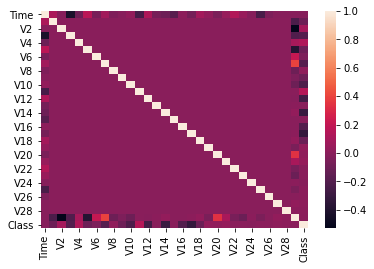

In [140]:
_ = sns.heatmap(cc.corr())

This has an odd appearance with high homogeneity in the interior. It shows that all the Vxx variables show no correlation (value = 0), but Time, Class, and Amount have varying levels of correlation with the different Vxx variables.

This may be because the classes are imbalanced. I will create barplots to compare the total entries for each class and then undersample to even out the class. Lastly, I will re-create the heatmap (Bachmann, 2019)

<AxesSubplot:xlabel='Class', ylabel='count'>

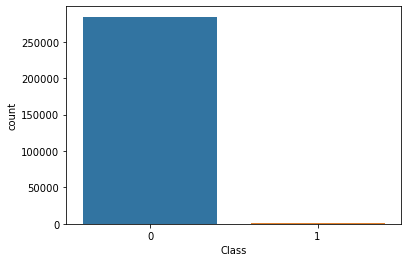

In [141]:
sns.countplot('Class', data = cc)

Wow. This illustrates that the dataset is severely imbalanced. Let's also take a look at the distribution of the transaction time and amount (Bachmann, 2019).

(0.0, 172792.0)

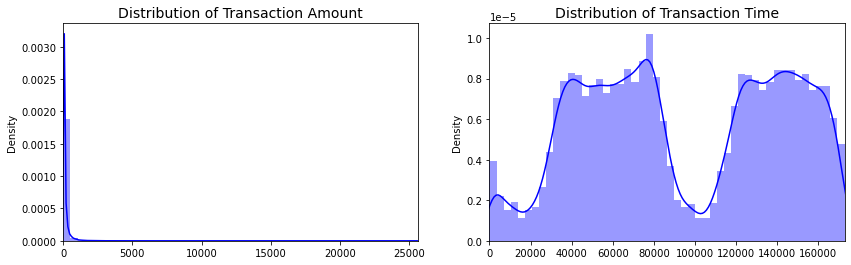

In [94]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))
amount_val = cc['Amount'].values
time_val = cc['Time'].values

sns.distplot(amount_val, ax = ax[0], color = 'b')
ax[0].set_title('Distribution of Transaction Amount', fontsize = 14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax = ax[1], color = 'b')
ax[1].set_title('Distribution of Transaction Time', fontsize = 14)
ax[1].set_xlim([min(time_val), max(time_val)])


The first plot above shows that most of the transactions (from both fraudulent and non-fraudulent events) were for small amounts. The second plot shows the time elapsed between the given transaction and the first transaction.<br>

Now I need to address Amount and Time, as I mentioned above. The quick barplot below shows that both variables have a high number of outliers. I am using RobustScaler() to transform these variables because it is less prone to outliers (Bachmann, 2019).

<AxesSubplot:xlabel='Class', ylabel='Amount'>

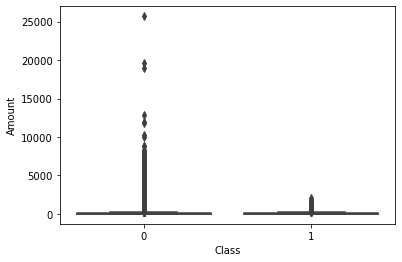

In [28]:
sns.boxplot(x= cc['Class'], y= cc['Amount'])

In [142]:
rob_scaler = RobustScaler()
cc['sc_amount'] = rob_scaler.fit_transform(cc['Amount'].values.reshape(-1,1))
cc['sc_time'] = rob_scaler.fit_transform(cc['Time'].values.reshape(-1,1))

cc.drop(['Time', 'Amount'], axis = 1, inplace = True)

cc.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,sc_amount,sc_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


It looks like those values were successfully scaled. Now I will proceed with random undersampling. Before applying that technique, I need to split the data so that I can still use the original dataset for testing.

In [143]:
X = cc.drop('Class', axis = 1) # X is all the columns but not class
y = cc['Class'] #y is the target: Class

skfold = StratifiedKFold(n_splits=5, random_state = None, shuffle = False)

for train_index, test_index in skfold.split(X, y):
    print("Train: ", train_index, "Test: ", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    
original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

Train:  [ 30473  30496  31002 ... 284804 284805 284806] Test:  [    0     1     2 ... 57017 57018 57019]
Train:  [     0      1      2 ... 284804 284805 284806] Test:  [ 30473  30496  31002 ... 113964 113965 113966]
Train:  [     0      1      2 ... 284804 284805 284806] Test:  [ 81609  82400  83053 ... 170946 170947 170948]
Train:  [     0      1      2 ... 284804 284805 284806] Test:  [150654 150660 150661 ... 227866 227867 227868]
Train:  [     0      1      2 ... 227866 227867 227868] Test:  [212516 212644 213092 ... 284804 284805 284806]


Now that I have pulled out original data that can be used for testing, I will randomly undersample the remaining data to create a balanced dataset for training. I will do this by finding out how many fraud transactions are in the dataset and then randomly selecting that many non-fraud transactions. This will produce a distribution of 50% of the data from each of the two classes. 

In [144]:
tot_fraud = cc['Class'].value_counts()[1]
tot_fraud

492

There are 492 fraud entries. I will pull out just these entries and 492 non-fraud entries.

In [145]:
#first shuffle the entries of the dataframe
cc = cc.sample(frac=1)

fraud = cc.loc[cc['Class']==1]
noFraud = cc.loc[cc['Class']==0][:492]

##### Now I will create one data frame with both fraud and non-fraud entries and then shuffle those entries

In [146]:
new_cc = pd.concat([fraud, noFraud])

#shuffle
new_cc = new_cc.sample(frac=1, random_state = 42)

new_cc.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,sc_amount,sc_time
92177,-0.691571,1.120611,1.175063,-0.140762,0.246300,-0.250687,0.452129,0.248762,-0.400099,-0.058917,...,-0.520772,0.014090,-0.047184,-0.225468,0.090599,0.364085,0.148056,0,-0.270104,-0.245304
238366,0.754316,2.379822,-5.137274,3.818392,0.043203,-1.285451,-1.766684,0.756711,-1.765722,-3.263007,...,0.141165,0.171985,0.394274,-0.444642,-0.263189,0.304703,-0.044362,1,-0.279466,0.763026
97299,-0.463069,1.083919,1.721463,0.046252,-0.116113,-1.082799,0.758765,-0.139773,-0.561858,-0.339056,...,-0.457629,0.017685,0.718540,-0.202718,0.047688,0.270174,0.127227,0,-0.244673,-0.217777
88258,-1.644403,3.129852,-2.576977,3.415573,-0.448525,-1.241893,-1.991652,1.002665,-2.809071,-4.153692,...,-0.648576,-0.318617,-0.680413,0.389869,0.055750,0.394682,0.298821,1,-0.214910,-0.265898
248296,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,-4.230984,...,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,1,-0.307413,0.812780
237699,2.026868,0.127407,-1.620094,1.405507,0.299118,-1.183488,0.548550,-0.339106,0.416791,0.299638,...,0.257772,0.014875,-0.046531,0.409865,-0.484755,-0.024014,-0.065003,0,-0.181793,0.759689
48135,1.293035,-1.556148,1.155696,-0.942488,-1.833674,0.739279,-1.602472,0.343387,-0.890867,1.134915,...,-0.753131,0.116432,0.009126,0.230655,-0.331661,0.091854,0.017182,0,0.237267,-0.483817
150668,-10.632375,7.251936,-17.681072,8.204144,-10.166591,-4.510344,-12.981606,6.783589,-4.659330,-14.924655,...,0.695603,-1.138122,0.459442,0.386337,0.522438,-1.416604,-0.488307,1,2.326836,0.107708
33998,-0.993636,0.228888,2.259090,-2.218729,-0.067588,0.254051,0.244337,-0.060792,1.384057,-1.401320,...,0.997712,-0.528150,-0.732389,0.496668,-0.596690,-0.269718,-0.138910,0,0.222455,-0.554823
38780,-1.276187,-0.553454,2.528048,-0.768719,-0.875640,0.784441,1.020201,0.137986,0.615057,-1.323491,...,-0.111053,0.446282,0.116125,0.024695,0.859097,-0.241628,-0.152279,0,3.283728,-0.530352


If I look at the "Class" column there is a healthy mix of both classes. Next I will create the same bar plot I used above to make sure the data are evenly distributed between the two classes.

<AxesSubplot:xlabel='Class', ylabel='count'>

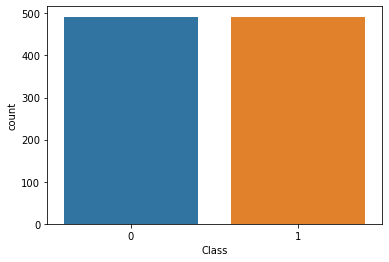

In [147]:
sns.countplot('Class', data = new_cc)

That's what I wanted. Now I'll re-create the heatmap to see if undersampling improved it.

<AxesSubplot:>

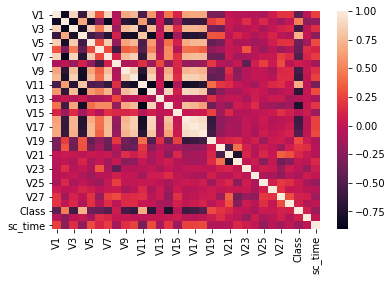

In [148]:
sns.heatmap(new_cc.corr())

Much better. That elimated those homogenous middle areas, and now I can more clearly see what variables may be correlated. <br>

Before moving on to creating the neural net, I will visualize the data using t-SNE.

In [149]:
X = new_cc.drop('Class', axis=1)
y = new_cc['Class']

X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values) #array

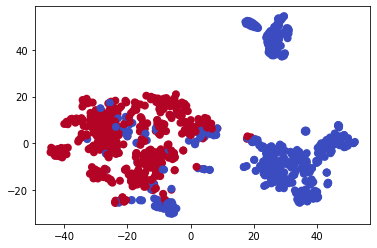

In [175]:
plt.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c = (y==0), cmap = 'coolwarm', label = "no fraud", linewidth = 2)

This dimensionality reduction using t-SNE produced fairly isolated the clusters, which suggests that predictive models will be able to separate the data according to class. However, the extend to which the blue data points are covering red data points isn't clear.

### Create a Neural Net for Predicting Fraud

In [151]:
#x and y were defined above from the undersampled data set.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42,shuffle=True)


In [152]:
print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number transactions train dataset:  787
Number transactions test dataset:  197
Total number of transactions:  984


These numbers are appropriate and confirm that we're working with the undersampled data. I used binary crossentropy as the loss function since there are only two variables in the target class (Lee, 2019). <br>


In [153]:
def create_model(units, optimizer, kernel_initializer):
    model = Sequential()
    model.add(Dense(units = units, activation = 'relu', input_dim = 30))
    model.add(Dropout(0.1))
    model.add(Dense(units = units, activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(units = 1, activation = 'sigmoid'))
    model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [154]:
UNITS = 8
EPOCHS = 100
BATCH_SIZE = 28

model = create_model(UNITS, 'adam', 'glorot_uniform')
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = BATCH_SIZE, epochs = EPOCHS, 
                    verbose=1, shuffle=True, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

Epoch 1/100
29/29 [==============================] - 0s 5ms/step - loss: 2.1189 - accuracy: 0.3774 - val_loss: 0.8354 - val_accuracy: 0.5431
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 1.0227 - accuracy: 0.5388 - val_loss: 0.5704 - val_accuracy: 0.7005
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 0.7325 - accuracy: 0.6569 - val_loss: 0.4827 - val_accuracy: 0.7310
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 0.6245 - accuracy: 0.6722 - val_loss: 0.4378 - val_accuracy: 0.7462
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5475 - accuracy: 0.7039 - val_loss: 0.4100 - val_accuracy: 0.7716
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 0.4981 - accuracy: 0.7433 - val_loss: 0.3880 - val_accuracy: 0.8020
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 0.4661 - accuracy: 0.7891 - val_loss: 0.3671 - val_accuracy: 0.8477
Epoch 8/100
2

#### Plot of Training and Validation Loss

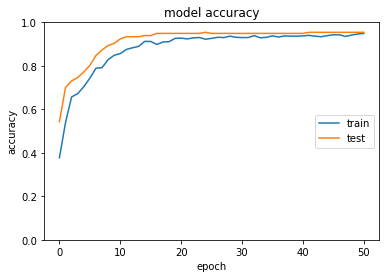

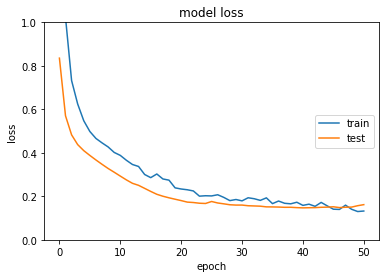

In [155]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='center right')
plt.ylim(0, 1)
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='center right')
plt.ylim(0,1)
plt.show()


In [156]:
round(max(history.history['accuracy']),2)

0.95

This model produced a high accuracy of 0.95 after 100 epochs. Together, the plots above show us that the model improves with each epoch. In the second plot, there is a decrease in the loss, or error, as more epochs are completed. This shows us that the model is improving and minimizing cost as it completes the epochs.

#### Performance Metrics <br>

I will pull in the Xtest data that I set aside before undersampling and use that to test the model and find the accuracy.

In [176]:
#try both history and model
preds = model.predict(original_Xtest, batch_size=200, verbose=0)

In [177]:
print(preds.size)
print(original_ytest.size)

56962
56962


In [178]:
#change the predictions to binary
preds_binary = (model.predict(original_Xtest) > 0.5).astype("int32")
preds_binary

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

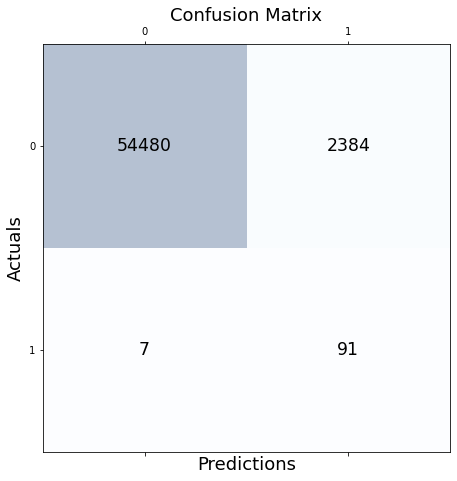

In [161]:
#create confusion matrix
cm = (metrics.confusion_matrix(original_ytest, preds_binary))

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [162]:
print(round(accuracy_score(original_ytest, preds_binary),2))

0.96


The confusion matrix confirms that there are a high number of true negatives. This is good because we would not want a model that erroneously flags everyday credit card transactions as fraudulent. There are 2384 false negatives in the test data, which are fraudulent transactions that went undetected by the model (false negative).

#### Adjusting Model Parameters
I will adjust some parameters just out of curiousity to see how that affects the accuracy. Given that I am simultaneously manipulating the parameters, there is no way to tell exactly what parameters are contributing to any observed change in accuracy. The goal here is to illustrate that changing the hyperparameters changes the accuracy and loss, as I already adjusted parameters to reach the 96% accuracy shown above.

In [163]:
def create_model2(units, optimizer, kernel_initializer):
    model = Sequential()
    model.add(Dense(units = units, activation = 'sigmoid', input_dim = 30)) #changed from relu
    model.add(Dropout(0.1))
    model.add(Dense(units = units, activation = 'sigmoid')) #changed from relu
    model.add(Dropout(0.1))
    model.add(Dense(units = 1, activation = 'sigmoid'))
    model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [164]:
UNITS = 3 #changed from first model
EPOCHS = 10 #changed from first model
BATCH_SIZE = 20 #changed from first model

model_2 = create_model2(UNITS, 'adam', 'glorot_uniform')
history_2 = model_2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = BATCH_SIZE, epochs = EPOCHS, 
                    verbose=1, shuffle=True, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

Epoch 1/10
40/40 [==============================] - 0s 4ms/step - loss: 0.7429 - accuracy: 0.5172 - val_loss: 0.7355 - val_accuracy: 0.4416
Epoch 2/10
40/40 [==============================] - 0s 1ms/step - loss: 0.6867 - accuracy: 0.5667 - val_loss: 0.6967 - val_accuracy: 0.4416
Epoch 3/10
40/40 [==============================] - 0s 1ms/step - loss: 0.6621 - accuracy: 0.5540 - val_loss: 0.6714 - val_accuracy: 0.4416
Epoch 4/10
40/40 [==============================] - 0s 2ms/step - loss: 0.6427 - accuracy: 0.5464 - val_loss: 0.6507 - val_accuracy: 0.4416
Epoch 5/10
40/40 [==============================] - 0s 1ms/step - loss: 0.6365 - accuracy: 0.5616 - val_loss: 0.6318 - val_accuracy: 0.6904
Epoch 6/10
40/40 [==============================] - 0s 2ms/step - loss: 0.6126 - accuracy: 0.7802 - val_loss: 0.6161 - val_accuracy: 0.8376
Epoch 7/10
40/40 [==============================] - 0s 2ms/step - loss: 0.6047 - accuracy: 0.7903 - val_loss: 0.5996 - val_accuracy: 0.8782
Epoch 8/10
40/40 [==

In [165]:
round(max(history_2.history['accuracy']),2)

0.82

Changing the activation function, batch size, number of epochs, and units decreased the accuracy, confirming that these parameters do in fact affect the measure of accuracy.

#### Discussion

In this project, I used an Artificial Neural Net to predict whether credit card transactions represent fraud or not. Here, I undersampled the data because the number of no-fraud transactions greatly outweighed the number of fraud transactions. The Artificial Neural Net produced a high level of accuracy. 

One of the dangers of the undersampling method that I used here is that there is information loss from eliminating sample data, which can result in decreased model accuracy. However, this risk has to be balanced with the risk of performing an analysis with an imbalanced data set, which can lead to overfitting.

Here, I left the outliers in the analysis. Although I did use the robust scaler, which is less prone to outliers, the outliers that I left in could still skew these results. If I removed outliers, it would be best to focus on extreme outliers in the categories that correlate highly with the target class. Removing the outliers would likely increase accuracy, and if my initial accuracy had been lower, it would have been a logical next step in the analysis. However, outlier removal does come with the tradeoff of information loss if a large number of outliers are removed (Bachmann, 2019).

#### References

Lee, V. (2019). Credit Card Fraud Detection. kaggle. Retrieved February 9, 2022 from https://www.kaggle.com/vladlee/credit-card-fraud-detection-keras/notebook.

Bachmann, J.M. (2019). Credit Fraud || Dealing with Imbalanced Datasets. kaggle. Retrieved February 9, 2022 from https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets.